In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Need for this homework
import geopandas as gpd
import contextily as cx

from shapely.geometry import Point

plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline
# This renders your figures as vector graphics AND gives you an option to download a PDF too
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')


In [2]:
# Read in data
avy_df = pd.read_csv('./avalanches.csv')
#display(avy_df.head())
#display(avy_df['Coordinates'].head())

# Split the coordinates into two columns
avy_df[['Latitude', 'Longitude']] = avy_df['Coordinates'].str.split(',', expand=True)

# Convert the columns to numeric
avy_df['Latitude'] = pd.to_numeric(avy_df['Latitude'], errors='coerce')
avy_df['Longitude'] = pd.to_numeric(avy_df['Longitude'], errors='coerce')

# filter lat/long outliers
avy_filtered = avy_df[
    (avy_df['Latitude'] >= 36) & 
    (avy_df['Latitude'] <= 42) & 
    (avy_df['Longitude'] >= -114) & 
    (avy_df['Longitude'] <= -108)
]

KeyboardInterrupt: 

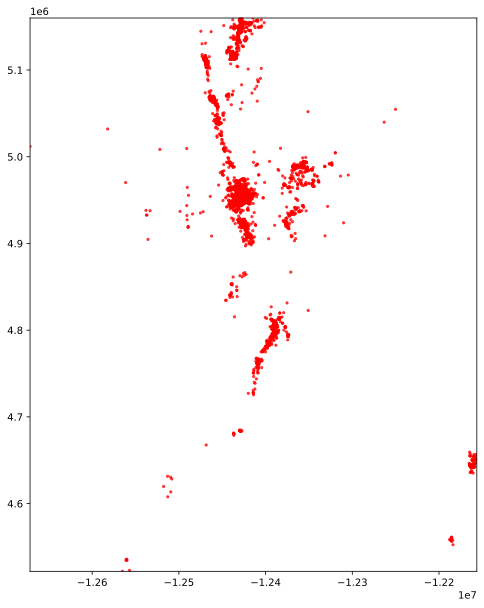

In [11]:
# Create a GeoDataFrame by converting 'Latitude' and 'Longitude' to geometry Points
geometry = [Point(xy) for xy in zip(avy_filtered['Longitude'], avy_filtered['Latitude'])]
imap = gpd.GeoDataFrame(avy_filtered, geometry=geometry)

# Set the coordinate reference system to WGS 84 (EPSG:4326)
imap.set_crs(epsg=4326, inplace=True)

# Reproject to Web Mercator (EPSG:3857) to match the basemap projection
imap = imap.to_crs(epsg=3857)

# Plot the avalanche points on a map with a basemap
fig, ax = plt.subplots(figsize=(10, 10))
imap.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7)

# Ensure the map extent covers the data points
ax.set_xlim(imap.total_bounds[[0, 2]])
ax.set_ylim(imap.total_bounds[[1, 3]])

cx.add_basemap(ax, crs=imap.crs.to_string(), source="https://tiles.opensnowmap.org/pistes/{z}/{x}/{y}.png", zoom=12)

# Set labels and title
ax.set_title("Avalanche Locations in Specified Latitude/Longitude Range", fontsize=15)
plt.show()


In [4]:
import folium

KeyboardInterrupt: 

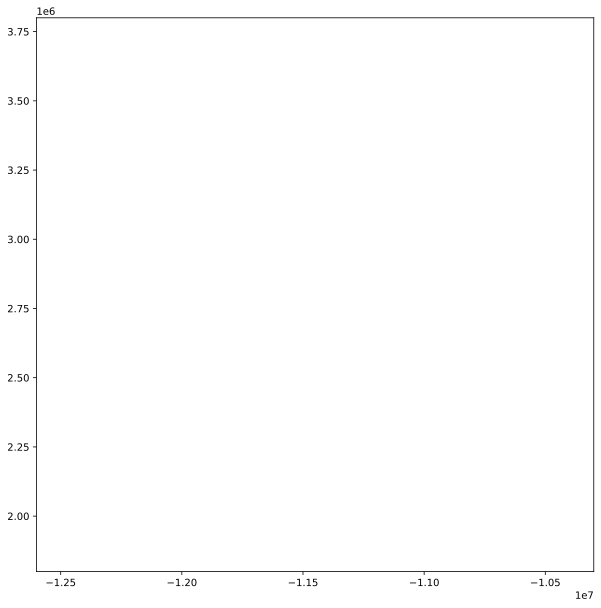

In [20]:
extent = (-12600000, -10300000, 1800000, 3800000)

# Plot the avalanche points on a map with OpenStreetMap basemap
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis(extent)
# Add OpenStreetMap basemap
cx.add_basemap(ax, crs=imap.crs.to_string(), source=cx.providers.OpenSnowMap.pistes, zoom = 10)

# Set labels and title
ax.set_title("Avalanche Locations with OpenStreetMap Basemap", fontsize=15)
plt.show()